In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import config
import matplotlib.dates as dates
import sklearn.linear_model as linear_model
plt.rcParams.update({'font.size': 18})


In [2]:
chem2017 = pd.read_excel('Eh pH fO2 BA1A 2017 recalc 2-21.xlsx')
chem2017.head()

/fp/homes01/u01/ec-johnmai/.conda/envs/spec/lib/python3.10/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,DEPT[M],PRESSURE,TEMP,PH,COND,O2,"""EH""","Eh, mV (corrected)",E0,"log(fO2), bars",dissoc H2O,delta H2O-H2,T moved,pH moved,Redox moved,Unnamed: 15,Unnamed: 16,SAL,SP
0,13.22,-0.535044,34.12957,7.674990,0.535000,5.264912,61.71064,249.241110,1.221380,-33.080879,-80.085478,47.004600,33.50594,9.612149,-31.99352,NaN,NaN,0.217899,-1.032044
1,13.23,-0.535044,34.21864,7.669997,0.535000,5.219978,62.04016,249.477463,1.221305,-33.061926,-80.057317,46.995391,45.00000,10.000000,-150.00000,Ellison example,NaN,0.217600,-1.023823
2,13.24,-0.535044,34.30774,7.665003,0.535000,5.175029,62.36979,249.713894,1.221229,-33.042986,-80.029163,46.986176,NaN,NaN,NaN,NaN,NaN,0.217300,-1.015571
3,13.25,-0.535009,34.39703,7.660032,0.534999,5.129851,62.69978,249.950487,1.221154,-33.023917,-80.000968,46.977051,NaN,NaN,NaN,NaN,NaN,0.217000,-1.007323
4,13.26,-0.520950,34.40801,7.673013,0.534700,5.068941,62.60991,249.849132,1.221145,-32.975755,-79.998791,47.023035,NaN,NaN,NaN,NaN,NaN,0.216800,-0.999076


In [3]:
chem2018 = pd.read_excel('Eh pH fO2 BA1A 2018 recalc 2-21.xlsx')
chem2018.head()

/fp/homes01/u01/ec-johnmai/.conda/envs/spec/lib/python3.10/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


,"depth, m",PRESSURE,"temperature, °C",pH,COND(FW),O2%,REDOX,"Eh, mV (corrected)",E0,"log(fO2), bars",dissoc H2O,Unnamed: 11,T moved,pH moved,Redox moved,Unnamed: 15
0,8.996,NaN,NaN,6.795000,NaN,NaN,196.4923,419.722300,NaN,NaN,NaN,NaN,33.50594,9.612149,-31.99352,NaN
1,9.046,2.900659,NaN,6.795170,NaN,56.68019,196.5919,419.821900,NaN,NaN,NaN,NaN,45.00000,10.000000,-150.00000,Ellison example
2,9.096,2.938823,33.50554,6.799098,4.182398,56.68979,196.3673,384.550505,1.221908,-27.853380,-80.554789,52.701409,NaN,NaN,NaN,NaN
3,9.146,2.946671,33.49601,6.805885,4.395324,56.71819,196.3788,384.571974,1.221916,-27.827062,-80.558342,52.731280,NaN,NaN,NaN,NaN
4,9.196,2.871685,33.48883,6.815248,4.498888,56.71642,196.2838,384.484484,1.221922,-27.797050,-80.555577,52.758527,NaN,NaN,NaN,NaN


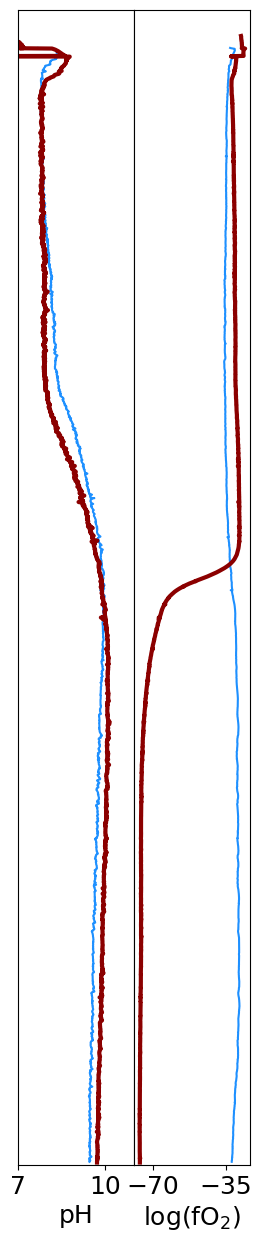

In [46]:
fig, ax = plt.subplots(1, 2, figsize=(3, 15), sharey=True)
fig.subplots_adjust(wspace=0.0, 
                    hspace=0.4)
ax[0].set_ylim(400, 0)
ax[0].set_xlim(7, 11)
# ax[0].set_ylabel('Depth (m)')
ax[0].set_yticks([])
ax[0].set_xticks([7, 10])
ax[1].set_xticks([-70, -35])
ax[0].set_xlabel('pH')
ax[1].set_xlabel('log(fO$_2$)')

ax[0].plot(chem2017['PH'], chem2017['DEPT[M]'], color='dodgerblue')
ax[0].plot(chem2018['pH'], chem2018['depth, m'], color='darkred', linewidth=3)
# chem2017.plot('PH','DEPT[M]',  ax=ax[0])
# chem2018.plot( 'pH','depth, m', ax=ax[0])
ax[1].plot(chem2017['log(fO2), bars'],  chem2017['DEPT[M]'], color='dodgerblue')
ax[1].plot(chem2018['log(fO2), bars'], chem2018['depth, m'], color='darkred', linewidth=3)